# Ensemble Learning and Random Forests

**Why aggregation?**

If you aggregate the predictions of group of predictors (classifiers or regressors), you will get often better predictions than with the individual predictor.

**What is Ensemble, Ensemble learning and Ensemble method?**

A group of predictors is called an "**Ensemble**" This technique is called "Ensemble learning" and an ensemble learning algorithm is called **"Ensemble method"**


**How RF works?**

You can train group of Decision Tree classifiers, each on different subsets of training data. To make predictions, you obtain the predictions of all individual trees, then predict the class that gets most votes. Such ensemble of Decision Trees is called a **Random Forest**.


**When we will use ensemble methods?**

We often use ensemble methods at the end of the project, once you have already built a few good predictors, to combine them into even better predictor.

**What are popular ensemble learning techniques?**

The most popular ensembling learning techniques are Bagging, Boosting and Slacking.


### Voting Classifiers

Suppose you have created a few classifiers acheiveing almost 80% accuracy. You may have Logistic Regression Classifier, Random Forest Classifier, KNN classifier and perhaps few more.

A very simple way to create even better classifier is to aggregate the predictions of each classifier and predict the class that gets most votes. This majority classifier is called "Hard voting" classifier.

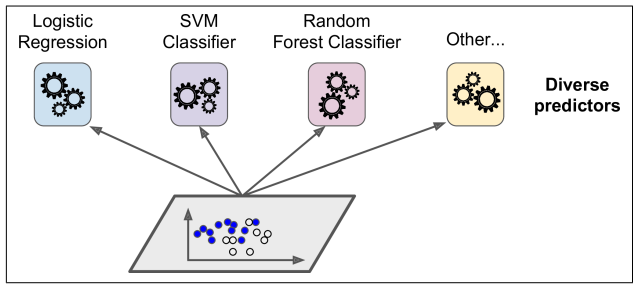

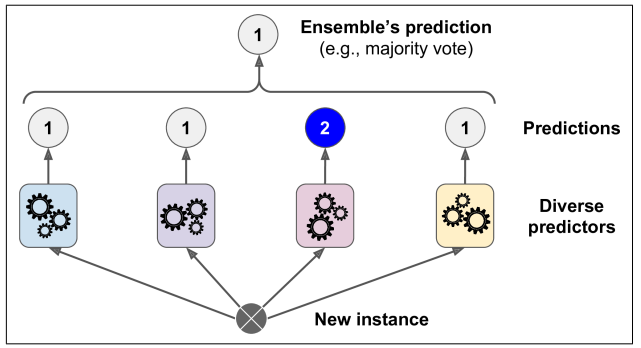

This voter classifier achieves higher accuracy than the best classifier in the ensemble. In fact even each individual classifier is weak classifier (meaning it does only slightly better than random guessing), ensemble can be still strong learning (achieves higher accuracy).

*Ensemble methods works best when the predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of errors, improving the ensembl's accuracy.*

#### Voting classifiers with python example

https://towardsdatascience.com/ensemble-learning-using-scikit-learn-85c4531ff86a

In [ ]:
import pandas as pd

df = pd.read_csv('Datasets/diabetes.csv')
df.head()

In [ ]:
df.shape

In [ ]:
df.dtypes

In [ ]:
# splitting the dataset

X = df.drop(columns =['Outcome'])
Y = df['Outcome']

print('X shape ',X.shape)
print('Y shape ',Y.shape)

In [ ]:
# Split the dataset into train and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, stratify=Y)

train_test_split takes 5 parameters, first two parameters are input and target data. test_size 0.3 means 30% our data is used for testing and 70% of our training is used for training. random_state to give the random seed value. Stratify to data stratification. Stratification is done to make our split represent the proportion of classes in the training set.

### Experiment with pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                             ('scaler', StandardScaler())])
features = X.select_dtypes(include=['int64', 'float64']).columns
features

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('numerical transformer', transformer, features)
])

In [ ]:
rf = Pipeline(steps=[('preprocessor', preprocessor), 
                     ('classifier', RandomForestClassifier()),
                    ])

rf.fit(X_train, y_train)
rf.score(X_test, y_test)

In [ ]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf",C=0.025,probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]

for classifier in classifiers:
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                          ('classifier', classifier)])
    pipe.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" %pipe.score(X_test,y_test))
    print('\n')

### End of experiment

_______________________________________________________________________________

-------------------------------------------------------------------------------

#### Building the Models

#### K-Nearest Neighbors

k-NN models work by taking a data point and looking at the 'k' closest labeled data points. The data point is then assigned the label of the majority of the 'k' closest points.

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# create dictionary of all values you want to test for n_neighbors
params_knn = {'n_neighbors':np.arange(1,25)}

# use gridsearch to test all values for n_neighbors
knn_gs = GridSearchCV(knn, params_knn, cv=5)

# fit model to training data
knn_gs.fit(X_train, y_train)

**GridSearch**

Grid search works by training our model multiple times

In [ ]:
# save the best model

knn_best = knn_gs.best_estimator_
knn_best

In [ ]:
# check best n_neighbors value
knn_gs.best_params_

#### Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
params_rf = {'n_estimators':[50,100,200]}
rf_gs = GridSearchCV(rf, params_rf, cv=5)
rf_gs.fit(X_train, y_train)

In [ ]:
rf_best = rf_gs.best_estimator_
print(rf_best)

rf_gs.best_params_

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

#### Testing the models with test data

In [ ]:
print(f'KNN: {knn_best.score(X_test, y_test)}')
print(f'Random Forest: {rf_best.score(X_test, y_test)}')
print(f'Logistic Regression : {log_reg.score(X_test, y_test)}')

From the score we can say that Random Forests perform better than the other models.

#### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# create dictionary of our models
estimators = [('KNN', knn_best), ('rf', rf_best), ('Log_reg', log_reg)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')

Lets put our three models in an array called 'estimators'. Next, we will create our voting classifier. It takes two inputs. The first is our estimator array of out three models. 

We will set our voting parameter to **hard**, which tells our classifier to make prediction by **majority vote.**

In [ ]:
# fit model to training data
ensemble.fit(X_train, y_train)

# test our model
ensemble.score(X_test, y_test)

### Hard Voting vs Soft Voting

Imagine that you have 3 classifiers (1, 2, 3) and two classes (A, B), and after training you are predicting the class of a single point.

**Hard voting Predictions**:

Classifier 1 predicts class A

Classifier 2 predicts class B

Classifier 3 predicts class B

2/3 classifiers predict class B, so class B is the ensemble decision.

**Soft voting Predictions:**

(This is identical to the earlier example, but now expressed in terms of probabilities. Values shown only for class A here because the problem is binary):

Classifier 1 predicts class A with probability 99%

Classifier 2 predicts class A with probability 49%

Classifier 3 predicts class A with probability 49%

The average probability of belonging to class A across the classifiers is (99 + 49 + 49) / 3 = 65.67%. Therefore, class A is the ensemble decision.

### Bagging

https://www.quantstart.com/articles/bootstrap-aggregation-random-forests-and-boosted-trees

https://medium.com/@rrfd/boosting-bagging-and-stacking-ensemble-methods-with-sklearn-and-mlens-a455c0c982de

**What is Bagging?**

Bagging is combination of bootstrapping and aggregating. Bagging is the process of taking bootstraps & then aggregating the models learned on each bootstrap

**What is Bootstrapping?**

Bootstrapping is a statistical sampling technique that involves random sampling of dataset with replacement to produce multiple separate training sets.

**How does bootstrapping help?**

Bootstrapping helps to decrease variance of the classifier and reduce overfitting. 




**Why Decision Trees are called 'high variance estimators'?**

Addition of small number of extra training observations can dramatically alter the prediction performance of the learned tree, despite the training data not changed to any great extent.

**Higher depth tree vs low depth trees**

DTs work very well especially if they are small depth. 

However realworld datasets can have large depths. Higher depth DTs are more prone to overfitting and thus lead to higher variance in the model. Thats why we say that DTs are   "High-Variance" estimators. 

**What are low-variance estimators?**

This is in contrast to a low-variance estimators such as linear regression. Which is not hugely sensitive to the addition of extra points at least those that one relatively close to the remaining points.

**How bagging reduces the variance?**

"Bootstrap Aggregation" or Bagging combines multiple learners  (such as DTs), which are fitted on separate bootstrapped samples.

Since each Dt takes a different set of training data as input, the deviations in the original training dataset do not impact the final result obtained from aggregation of DTs. Therefore bagging as a concept reduces variance without changing the bias of the complete ensemble.

**How variance is reduced?** if N independent and identically distributed observations x1, x2, x3.. xN are given. Each with variance of σ^2 then the variance of the mean of the observations x_bar is (σ^2)/N. That is, if the average of these observations is taken the variance is reduced by factor equal to number of observations.

### Practical Questions on Random Forests

https://stats.stackexchange.com/questions/53240/practical-questions-on-tuning-random-forests

**Deeper trees vs More Trees?**

Deeper trees and more trees related to bias-variance trade-off. Deeper trees reduces the bias; More trees reduces the variance. More number of trees is better it reduces the variance. If you have lot of variables and few observations more trees are recommended.

**Important Hyper-parameter**

The most important feature is how many features to test for each split. The more useless features you have, the more features you should try.

**How to evaluate RF when to stop?**

One way to evaluate and know when to stop is monitor your error rate while building the forest and detect when it converges. 


**How to control the tree depth?**

Limit max_depth, limit number of nodes, limit no. of features required to split, Stop splitting if the split does not improve the fit.

**How to deal with noisy data with RF?**

It is recommended to prune (limit depth of) the trees if you are dealing with noisy data. 

**Why random Forests??**

It performs bootstrp aggregation and Random feature selection for both classification and regression.

**What is CART??**

Classification and Regresstion Trees (CART) belong to a family of trees structured regressors and classifiers. The algorithm-based approach for create carts involves repeated binary splits of objects, namely nodes or leaves into subnodes or subleaves. For each split a predictor variable and corresponding cut-point are used to partition a node into two subnodes.

**How the node is split?**

If the predictor variable x is numerical, the cut-points are unique midpoints of the intervals between ordered values from this predictor. Then node cases are partitioned into two subnodes depending on whether the value of x is below or above the cut-point. 

For example, suppose in a node S containing five cases, the values of xj are -1.0, 1.0, 1.0, 2.8 and 3.6. Then the corresponding unique midpoints are 0, 1.9 and 3.2. So three possible binary splits by xj are “if xj > 0 or not”, “if xj > 1.9 or not” and “if xj > 3.2 or not”. We see it is the order of xj values
but not their actual values that matters.

If x is a categorical variable there will be 2^(N-1) -1 possible binary splits. Suppose variable S have 3 unique categories red, blue and green then we can split the node S on three ways, "if red or not", "if blue or not", "if green or not".

**What is main idea behind splittin the nodes?**

The fundamental idea behind node splitting is to make each subnode as homogeneous ("pure" means all examples having same class) after current split. For regression trees Sum of Squared Errors (SSE) are typically used to measure Information Gain.

For classification we use Gini Index. 


**Till when splitting is repeated??**

Splitting is done till a largest possible tree is obtained and no more nodes can be split.


**What is the prediction in regression and classification problems??**

Prediction in regression problem is arthemetic average of all training case responses in Node. While for classification the prediction is class that gets most votes.


**What is pruning?**

Usually the largest tree in which thre are no more splits that can be done, performs badly for a new test dataset, because the variance of prediction increases as the size of the tree exceeds the optimal. Accordingly, pruning is conducted to avoid this overfitting problem.


**Why pruning is not needed in Random Forests??**

1.Samples used in to train individual trees are "bootstrapped"

2.You have multiple random forest using random features and thus individual trees are strong but not correlated each other.

**Bootstrapping vs pruning for overfitting trees**

Pruning reduces the overfitting but Boostrapping reduces the overfitting for a great extent. Bagging effectively reduces prediction variance.


**What factors affect prediction errors of an ensemble of trees?

1.How accurate the individual trees, and

2.How dissimilar the trees from each other. 

Factor 1 is responsible for the prediction bias and factor 2 is responsible for the variance of forest. 

**How bagging reduces overfitting?**

The bagging approach avoids generating exactly the same trees by resampling with replacement, which in turn reduces prediction variance and alleviates overfitting of tree ensemble.

### Bagging and Pasting in Scikit-Learn

In [ ]:
from sklearn.ensemble import BaggingClassifier   # sklearn API for bagging 
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),
    n_estimators = 1000,    # it trains ensembe of 500 DT classifiers
    max_samples = 200,     # each DT classifier is trained on 100 randomly sampled training instances from training set with replacement
    bootstrap=True,         # if you want to use pasting set bootstap=False
    n_jobs = -1)   # n_jobs parameter tells scikit-learn to use number of CPU cores for training and predictions

# -1 tells to use all the available cores

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict_proba(X_test)
y_pred2 = bag_clf.predict(X_test)
import pandas as pd
results = pd.DataFrame(y_pred, y_pred2)
results

Pasting and Bagging are very similar, the main difference being that Bagging samples with replacement (which is called "bootstrapping") while Pasting samples without replacement. 


The BaggingClassifier automatically performs soft voting instead of hard voting if the base classifier can estimate class probabilities (i.e.,if it has predict_proba() method), which is the case with Decision Tree classifiers.

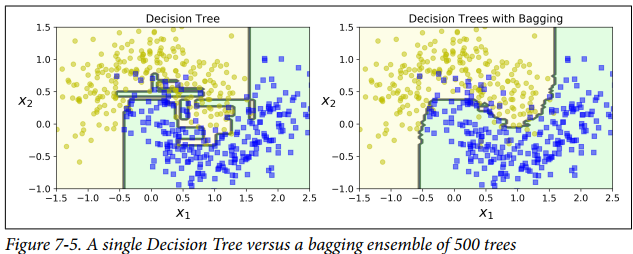

### Out-of-Bag Evaluation

https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710

**What is Out of Bag evaluation and how it will be useful during training?**

With bagging some instances may be sampled severl times for any given predictor, while others may not be sampled at all. 

By default a BaggingClassifier samples m training instances with replacement (bootstrap=True), where m is the size of the training set.

This means that about 63% of the training instances are sampled on average for each predictor (As m grows, this ratio approches 1-exp(-1)=63.212%). The remaining 37% training instances that are not sampled are called **Out-of-bag(oob)** instances. Note that they are not the same 37% for all predictors.

*Since a predictor never sees the oob instances during training, it can be evaluated on these instances, withou the need for separate validation set.*

**What parameters to change to enable OOB evaluation?**

In Scikit-learn, you can set oob_score=True when creating a BaggingClassifier to request an automatic oob evaluation training. 

In [ ]:
bag_clf = BaggingClassifier(
            DecisionTreeClassifier(),
            n_estimators=500,
            bootstrap=True,
            n_jobs=-1,
            oob_score=True)

bag_clf.fit(X_train, y_train)
bag_clf.oob_score_
# according to this oob evaluatuon this Bagging classifier is likely to acheive about
# 77% accuracy on the test set.

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = bag_clf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
# obb decision function for each training instance is also available through
# oob_decision_function_variable

bag_clf.oob_decision_function_

### Out-of-Bag score vs Validation Score

As compared to the validation score OOB score is computed on data leftover   data that is given as the unseen data to the classifier. 

(It is not leftover data after all the samples are taken. but it is leftover data after particular sample is taken from population for a particular classifier)

Whereas for calculating validation score, a part of the original training dataset is actually set aside before training the models.

Additionally, the OOB score is calculated using only a subset of DTs not containing the OOB sample in their bootstrap training set. While the validation score is calculated using all the DTs of the ensemble..

In case where we do nt have a large dataset and want to consume it all as training dataset, the OOB score provides a good trade-off.

out-of-bag estimate is as accurate as using a test set of the same size as the training set. Therefore, using the out-of-bag error estimate removes the need for a set aside test set.

### Random Patches and Random Subspaces

**Does Random Forests support Feature Sampling?**

The BaggingClassifier class supports sampling the features as well.  

**What are the hyperparameters that supports features sampling in RF?**

Feature sampling controlled by two hyperparameters: max_features and bootstrap_features. They work same way as max_samples and bootstrap, but for feature sampling instead of instance sampling. 

Thus, each predictor will be trained on random subset of input features.

**when does feature sampling more useful in Random Forests?**

This is particularly useful when you are dealing with high-dimensional inputs (such as images). 

**What is Random Patches method?**

Sampling both training instances and features is called Random Patches method.


**What is Random Subspaces method?**

Keeping all the training instances (i.e., bootstrap=False and max_samples=1.0) but sampling features (i.e., bootstrap_features=True and/or max_features smaller than 1.0) is called Random Subspaces method


**What are the techniques to estimate the prediction error in RF?**

Cross validation and OOB evaluation are two major techniques that help to estimate the prediction error.

**What is predictor variable Imporance**

Predictor variable is important if prediction performance is imporved by using the predictor varible and diminished by ignoring it.

**How prediction performance is computed in Regression problems?**

In regression prediction performance is computed by first treewise determining squared errors for predicting training cases left-out of the resampled tree construction and then averaging all such errors over all trees in forest.

**How prediction performance is computed in Classification problems?**

In classification prblems, increase in misclassification error after permutation can be taken as the measure of the variable importance.


**How feature importance is calculated?

out-of-bag samples are used to calculate the feature importance. First, the prediction accuracy on the OOB samples is measured. Then the values of the variable in the OOB samples are randomly shuffled, keeping all the other variables same. Finally decrease in the prediction accuracy on the shuffled data is measured.

If the accuracy is decreased by great extent it means that variable has more predictive power. If there is no decrease the feature is not that important. 


**How to deal with the missing values of the predictor variable?**

For classification problems, If it is a numerical variable, replace missing values with median. If it is categorical variable replace missing values with mode.

For regression problems, use median value to replace. 

**What are variations of Random Forests?**

Random Survival Forests (RSF), Multivariate Random Forests, Enrinched Random Forests, Quantile Regression Forests.

**Random Forest is Baggin technique or boosting technique?**

RF is a bagging techniqe not boosting technique. The trees in random forests run in parallel. There is no interaction between these trees while buliding the treees.


**Why random forest is a meta-estimator?** 

it combines results of multiple predictions. It aggregates many decision trees.

**What happens when we increase number of trees in random forests?**

Generalization error for classification decreases as the number of trees increases. This statement conveys that as  the number of trees increases no. of samples from data are also increased. 


**Factors affecting the perforamnce of the RF?**

1.*Feature importance*: If there are important variables in the test set, the RF model performs better.

2.*No. of Predictor variables"* Prediction accuray increases by increase in No. of predictor variables in the dataset.

3.Number and size of the trees.



### Random Forests

**What is Random Forest?**

A RF is collection of classification or regression trees generated by a bootstrap procedure. Each tree is grown from an independent bootstrap resample until all nodes contain observations no more than a prespecified maximal node size. No pruning is done, unlike in the case of single tree. Each tree in the forest provides a prediction of a presponse variable of interest, and a single overall prediction is obtained by taking average over the tree predicitons from the forest.

**How value is predicted in RF regression?**

For regression the predicted value at a node is the average response variable for all observations in the node.

**How value is classified in RF classification**

For classification the predicted class is the most common class in the node (Majority vote).

We can also do soft voting.



Random Forest is an ensemble of Decision Trees, generally trained with bagging method, typically with max_samples set to the size of training set.

Instead of building *BaggingClassifier* and passing it a *DecisionTreeClassifier*, you can instead use the *RandomForestClassifier* class, which is more convenient and optimized for Decision Trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=1000, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred_rf)

**What kind of hyperparameters does a Random Forest Classifier have?**

With a few exceptions, a *RandomForestClassifier* has all the hyperparameters of a *DecisionTreeClassifier*(to control how trees are grown), plus all the hyperparameters of a BaggingClassifier to control ensemble itself.

Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best features when splitting node, it searches for the best feature among a random subset of features.

This results in a greater tree diversity, which trades a higher bias for lower variance, generally yielding an overall better model.

Random Forests are similar to the procedure of bagging except they make use of technique called "Feature Bagging", which has the advantage of significantly decreasing the correlation between each of the DT and thus increasing its predictive accuracy on average.

That is, if a particular feature is strong in predicting the response value then it will be selected for many trees. Hence a standard bagging procedure can be quiet correlated. Random Forests avoids this by deliberately leaving out the strong features in many of the grown trees.

#### Advantages of Random Forests

1.Highly accurate

2.Runs effectively on large databases

3.Can handle lot of input variables

4.It estimates what variables are important in prediction

#### Disadvantages of Random Forests

overfits noisy classification/regression tasks

### Extra-Trees

Extra tress algorithm builds unpruned decision or regression trees. Predictions of the trees are aggregated to yield the final prediction, by majority vote for classification and arthemetic average in case of regression.

**What are the two main differences between Extra trees and other tree based ensemble methods?**

1.It splits nodes by choosing cut-points fully at random.

2.It uses full learning sample rather than bootsrap replica.

It trades more bias for variance.

You can create an Extra-Trees classifier using Scikit-Learn's "ExtraTreesClassifier" class.

**What parameters does Extra trees take?**

K, no. of attributes randomly selected at each node. 

n, min sample size to split the node.


**How Extra-Trees classifier reduces the variance?**

Explicit randomization of the cut point and attribute combined with ensemble averaging will reduce the variance. 



## Boosting

Boosting is a *sequential ensemble model*. In boosting more importance is given to misclassified values. Here performance of the model is improved by assigning higher weightage to the previously incorrect examples. You keep doing this until wrongly predicted values are correctly classified.

Bagging is a *Parallel Ensemble method* where the random samples are drawn from the original training set (Bootstrapping), and train the predictors using these bootstraps and predictions of these predictors are aggregated in order to make a strong prediction. Ex: Random Forests.

The popular Boosting techniques are Adaptive boosting (Adaboost), Gradient Bossting and XGBoost.

Boosting is an ensemble method that combines several weak learners to form a strong learner. These weak learners are generated by applying ML algorithms on different distributions of a dataset. Decision Trees are default weak learners in Boosting.These base learners generate weak rules for each iteration, after multiple iterations these multiple weak learners are combined to strong learner predicts more accurate predictions.

#### How Boosting works?

**Step-I** The base algorithm reads the data and assigns equal weight to all different data points.

**Step-II** The alforithm analyze the data and tries to draw decision stump.

**Step-III** Then it checks for any false predictions made.

**Step-IV** False predictions are assigned to the next base classifier with higher weightage on the incorrect predictions.

**Step-V** Repeat the step until the algorithm can classify the output correctly.

### Adaptive Boosting (Adaboost)

In Random Forest each time you make a tree, you make a full sized tree. Some trees are bigger than the others but there is no predetermined depth. In contrast, in a forest of trees made with AdaBoost, the trees are usually just a node with two leaves (called "Stump"). So AdaBoost is forest of stumps rather than trees.

Decision Trees takes advantage of all the variables in the dataset to make decision. But a stump can use only one variable to make decisions. Stumps are not really good at making classifications, they are technically weak learners.

In Random Forests, each tree has equal vote in the final classification. In contrast, in a forest of stumps made with Adaboost, some stumps get more importance than the others.

Lastly, in Random Forest, each decision tree is made independently of others. In other words, it doesnt matter which tree was made first. In contrast, in a forest of stumps made with adaboost order is important. Errors the first stump made influences how second stump is made and errors the second stump is made influences how third stump is made.. so on..

**Summary**

1. Adaboost combines a lot of "weak learners" to make classification. Weak learners are almost stumps.

2. Some stumps get more importance than the others in the classification.

3. Each stump is made by taking previous stump's mistakes 

#### How Adaptive boosting works?

**Step-I** Each observation is weighted equally for first decision stump

**Step-II** Misclassified observations are identified and they are assigned with higher weights.

**Step-III** New decision stump is created by considering the observations with higher weights as more significant.

**Step-IV** The process continues until all the observations fall into right class.

**What are drawbacks of the Adaboost?**

One important drawback of sequential learning technique is it cannot be parallelized. Since each predictor can only trained after the previous predictor is trained and evaluated. As a result it cannot scale as bagging and pasting.


**How to deal with Adaboost when the model is overfitting?**

Try reducing number of estimators or more slightly regularize the base algorithm.

**AdaBoost is used for Classification or Regression?**

It can be used for both classification and regression but It performs well on classification.

**What  are the assumptions of AdaBoost?**

It assumes that weak hypothesis has accuracy little bit better than random guessing. It is called as Weak learning condition.

**Overfitting in Boosting!**

Boosting has lot of resistence to overfitting. Even if you add more trees to the classifier It will not overfit. The test error will be still reduced even after the training error is zero. Even if you add few 100 trees it will not overfit but you have to think about simplicity. combination of few trees is much simpler than lot of trees and both performing almost equally on the training and test set.

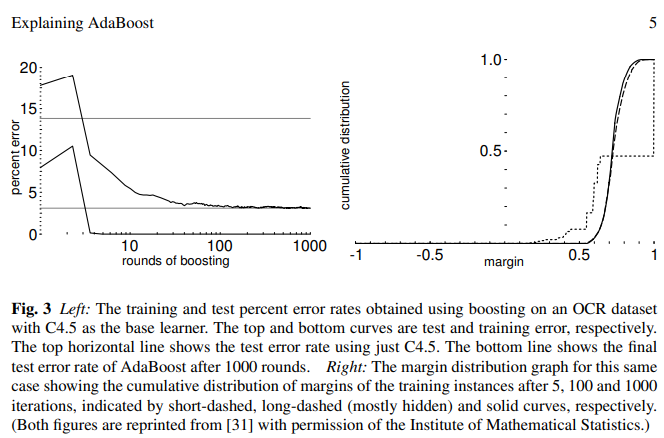

How to understand this behavior? Training error only tells us part of the story in that it only reports no. of examples that are correctly or incorrectly classified. Instead to understand Adaboost, we also need to consider how confident are the predictions are made by algorithm. 

Although training error is not changing after few rounds the confidence in those predictions is increasing dramatically with additional rounds of boosting. And this increase in confidence which accounts for the better generalizaton performance.

The confidence quantity we are using is called margin. Margin is difference between votes for correct label and votes for incorrect label. Margin will be high when a correct label is predicted with more majaorty. Thus magnitude of the margin is reasonable measure of confidence. 



### Gradient Boosting

### Briefly comparing Gradient boost and AdaBoost


**1.Gradint boost starts by making a single leaf, Adaboost starts by stump**

AdaBoost starts by building very short trees called a "Stump", from the training data. and the amount of importance that stump has on the final output is based on how well it compensated for these previous errors. Adaboost continues to make stumps in this fashion until it has made the number of stumps you asked for or has a perfect fit.

In contrast, Gradient boost starts by making a single leaf, instad of a tree or stump. This leaf represents an initial guess (average value) for the responses of all the instances. 

**2.Adaboost builds fixed size stumps, Gradient boost builds trees larger than stump**

Then Gradient boost builds the tree, like adaboost, this tree is based on the errors made by previous tree, but unlike Adaboost, this tree is larger than stump. Thats said, Gradient boost still restricts the size of the tree. In practice people set maximum no. leaves between 8-32.

Thus like adaboost, Gradient boost builds fixed size trees based on the previous trees errors, but unlike AdaBoost, each tree can be larger than stump.

Thats said, Gradient boost still restricts the size of the tree. In practice people set the maximum no. of leaves between 8-32.


**3.Also like adaBoost, Gradient boost scales the trees. However Gradient Boost scales all trees by same amount.**

Gradient boost builds multiple trees based on the errors made by the previous trees, and it scales the tree and gradient boost continues to build trees in this fashion until it has made number of trees you asked for, or additional trees fail to improve the fit.

### Gradient Boosting for Regression

**First Step - Create Single Leaf**

Gradient boost starts by making single leaf. and it assigns average value of the response variable to that leaf. If we would stop Gradient boost right here it will predict every instance as average value. However Gradient boost doesnt stop here.  

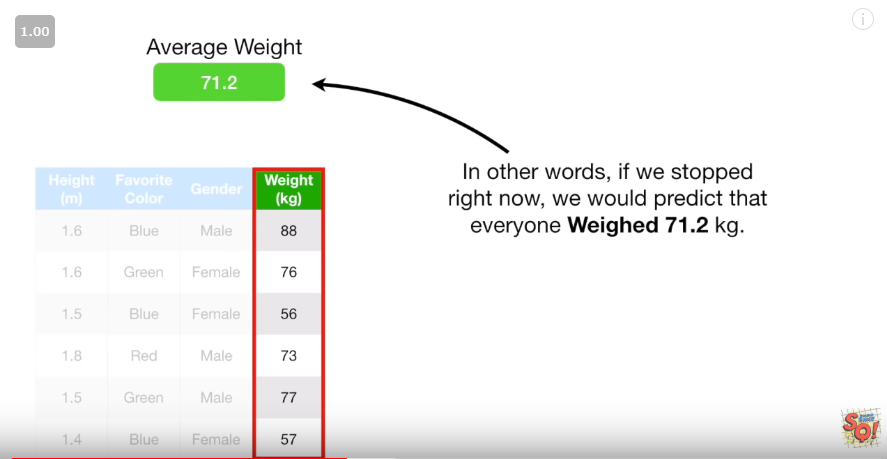

**Calcuate "Pseudo Residuals"**

The next thing we do is build trees based on the errors from the first trees.
Calculate the difference between our average weight and actual response for all the variables. This difference is called as "Pseudo Residual" (The term pseudo residual is based on the linear regression, where the difference between observed values and predicted values results in residuals. The pseudo part of pseudo residual is a remainder that we are doing Gradient boosting not linear regression)


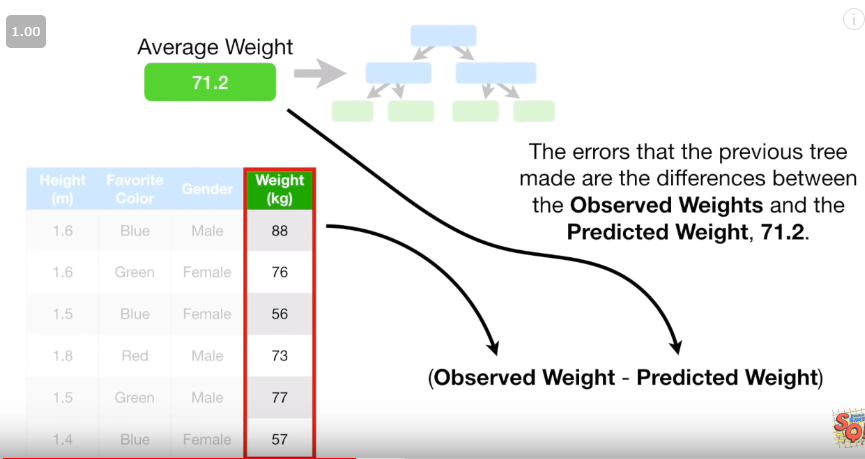

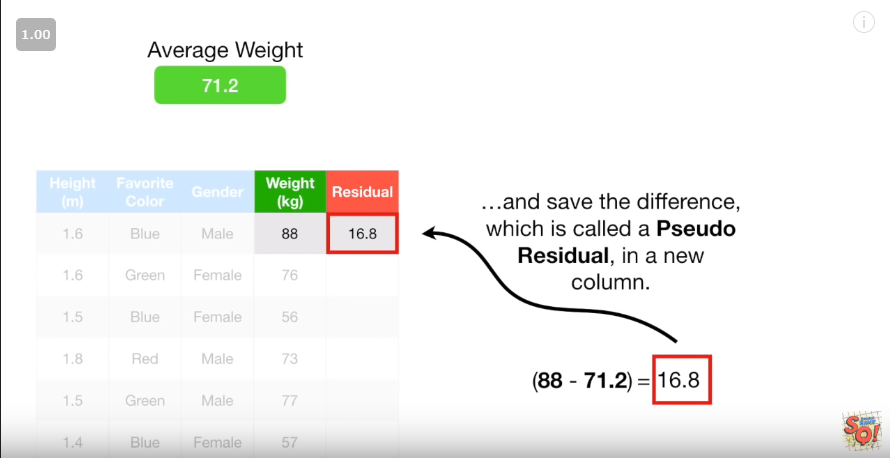

#### Build a tree to predict these residuals

Now we will build a tree to predict these residuals. By restricting the total No. of leaves, we  get fewer leaves than residuals. As a result a single leaf now holds data (residuals) for a few rows. To make it a single value we replace these residuals with their average.

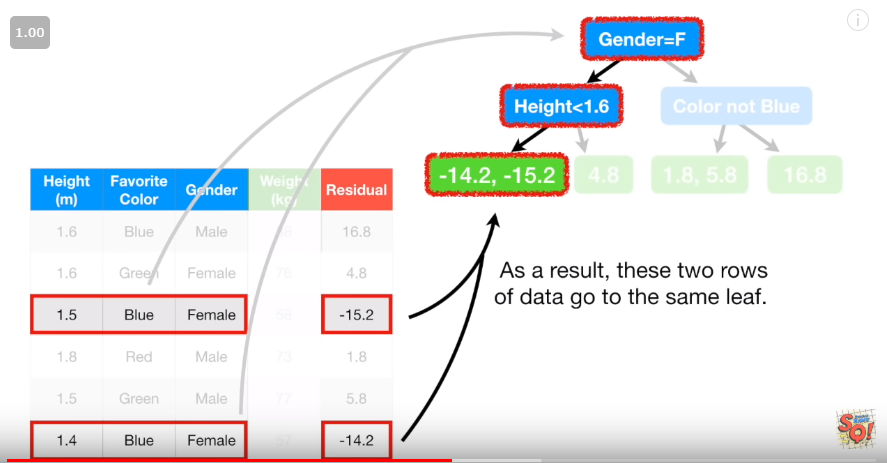

#### Combine original leaf with tree

Now we combine original leaf with new tree to make new prediction of response from training data. 

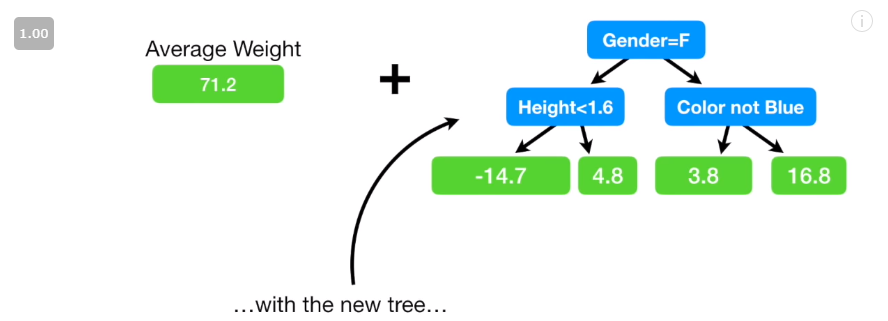

We start with inital prediction then we run the data down the tree. So our 

new prediction = Old prediction + predicted Residuals



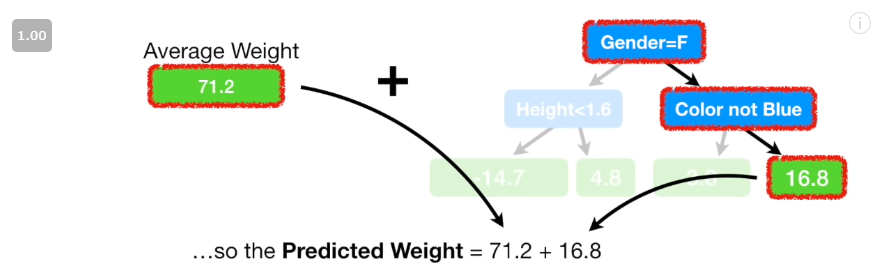

If you do like this it will get into problem of overfitting due to variance. Here we might have low bias while predicting but it leads to high variance.

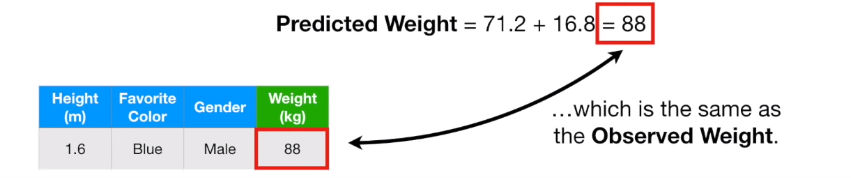

#### Learning rate

Gradient boosting this problem with "Learning Rate" to scale the contribution from new tree. Learning rate is value between 0 to 1.

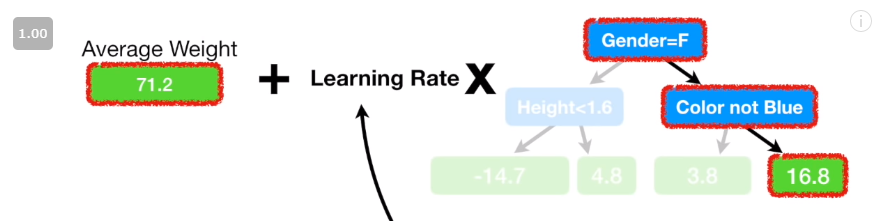

Predicted Weight = Old Prediction + (Learning rate * Predicted Residual)

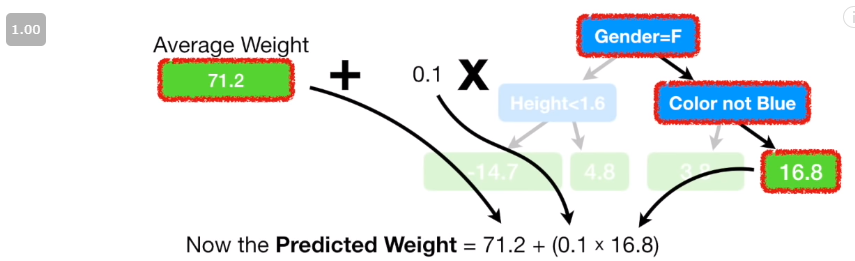

**Why do we scale learning rate?**

Scaling the tree with learning rate results in the small step in the right direction. Which then helps in better predictions with a testing dataset with a low variance.


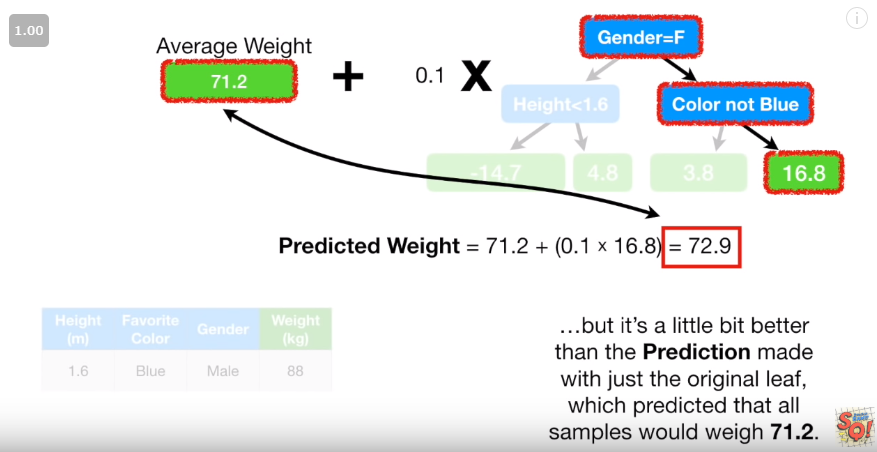

**Predict the weight for all the rows**

Just like before calculate the prediction for all the instances.

**Then calculate the residuals**

After you calculated the new predicted weights with the help of the learning rate (Predicted Weight = Old Prediction + (Learning rate * Predicted Residual), These becomes your new predictions. 

Then calculate the difference between the actual response and new predicted responses. Do it for all the instances.

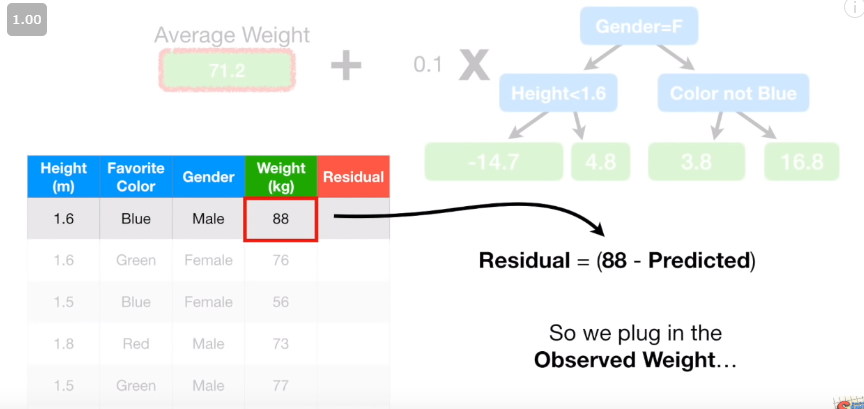

Now we have both the residuals, The first residuals is when we took a leaf and assined the average value of the response and calculated the difference between actual and average values. The second residuals are what we get from our new predicted values. 

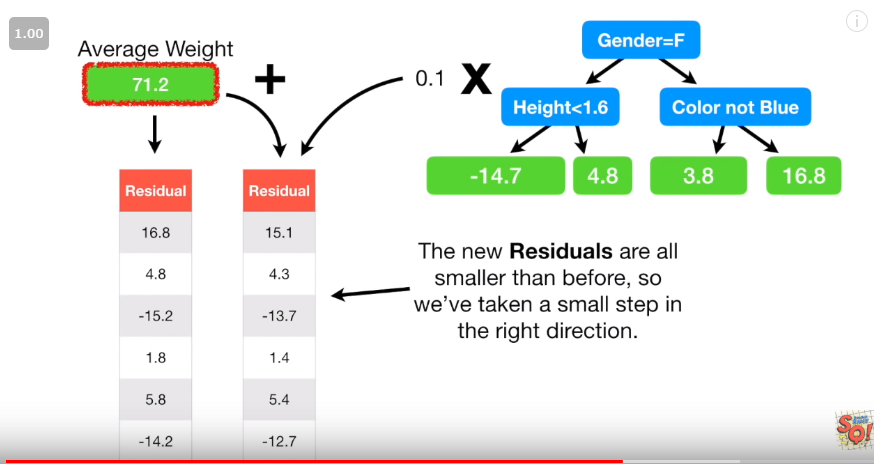

Now our residuals are smaller than the residuals before that says that we are taking small steps in the right direction. 

#### Again create a new tree to predict new residuals

Again we are creating a new tree to predict our new residuals. We will get multiple values in the leafs and we take the average of those values to make it a single value. 

Now we combine the new tree with previous tree and intial leaf and we scale all the trees with same learning rate and add everything together. Now we are ready to make a new prediction.

Just like before we start with initial prediction, then add the scaled amount from the first tree and then the scaled amount from the second tree. So this is our another small step which is close to the actual respose.

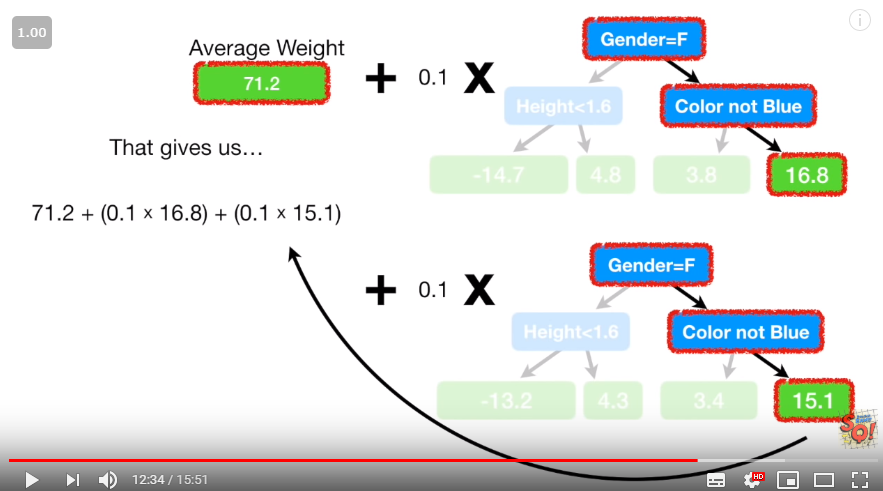

#### Calculate new residuals

Now we use actual leaf, scaled values from the first tree and scaled values from the second tree to calculate the residuals. 

By now we have three residuals, each time we add a tree to the prediction, the residuals get smaller. Now we build another tree to predict the residuals and add it to the chain of trees we already created. And we keep making trees until we reached the maximum specified trees or adding additional trees does not significantly reduce the size of the residuals.

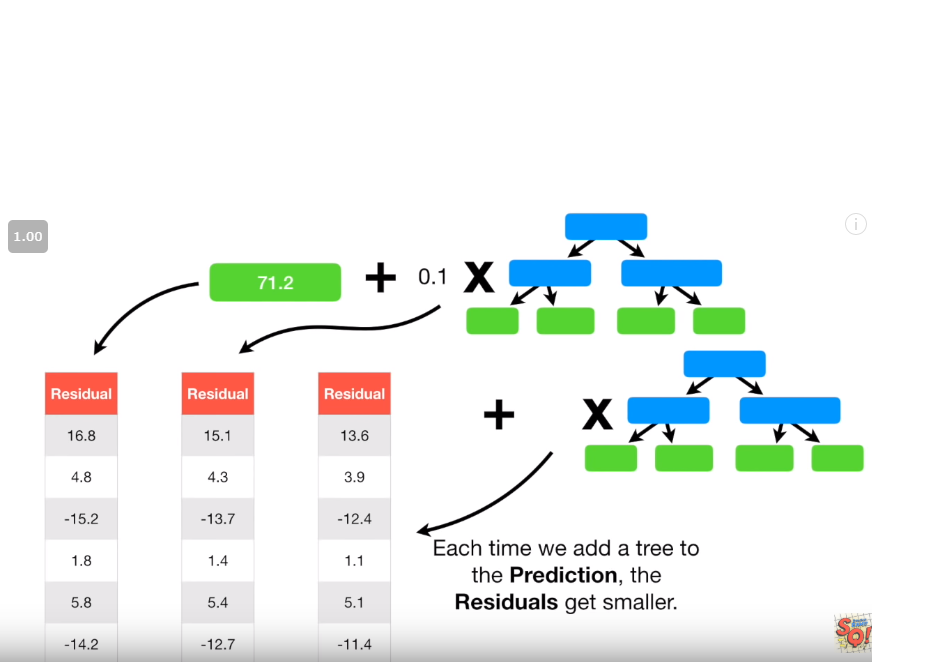

#### How this model generalizes new instances

When we get some new measurements, we can predict the responses by starting with the intial prediction (avg), then adding the scaled values from the first tree, and second tree and third tree etc.. etc.. etc. When the math is done we will left with the prediction. 

#### Summary

In summary when Gradient boosting is used for the regression we start with the average value of the variable we want to predict. Then we add a tree based on the Residuals, and we scale the tree's contribution to the final prediciton with learning rate, then we add another tree based on the new residuals and we keep on adding trees based on the errrors made by previous trees.

#### How to implement Gradient Boosting in python

A simpler way to create Gradient boosting is to use "GradientBoostingRegressor" class in scikit-learn.

**What are the hyperparameters to control the growth of the trees?**

max_depth, min_samples_leaf etc.,

**What are the hyperparameters to control the ensemble training?**

n_estimators and learning_rate


**What does learning_rate hyperparameter does?**

It scales the contribution on each tree. If you set it to low value, such as 1.0 you will need more trees in the ensemble to fit the training set, but the predictions usually generalize better. This regularization is called **"Shrinkage"**

**How to find optimal no. of trees?**

In order to find optimal No. of trees you can use early stopping, A simple way to implement this is to use staged_predict() method. 

**What is stochastic Gradient Boosting?**

Subsets of the the rows in the training data can be taken to train individual trees called bagging. When subsets of rows of the training data are also taken when calculating each split point, this is called random forest.

These techniques can also be used in the gradient tree boosting model in a technique called stochastic gradient boosting

"GradientBoostingRegressor" supports "subsample" hyperparameter, which specifies the fraction of training instances to be used for training each tree. subsample=0.25, means 25% of the training instances should be selected randomly. This trades higher bias for lower variance. It also speeds up training.

**Loss functions in Gradient Boosting**

Cost functions of Gradient boost algorithm are controlled by "loss" parameter. "devience" is default loss function. It is used for binary classification. You can also use "exponential" loss function.

### Hyperparameters of Gradient Boosting

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

## XGBoost

Optimized implementation of Gradient boosting is XGboost. It is very fast and scalable. It performs automatic early stopping.

### Difference between Bagging and Boosting

https://quantdare.com/what-is-the-difference-between-bagging-and-boosting/

### Difference between Adaboost, Gradient Boost and XGBoost